# Imports

In [97]:
library(tidyverse)
library(boot)

# Versions

## v1

## v2

## v3.0.1

### Import Data

In [150]:
# Clean up: Remove all vars
rm(list = setdiff(ls(), lsf.str()))

In [151]:
# Subjects who completed
subs = c(1,11,14,15,17,20,21,24,26, 27, 28, 29, 30, 31, 35, 37, 40)

# Dropbox path
dropbox = "/Users/djw/Dropbox/DJW_Projects/01_MADE/CODE/v3/subject_data"

# iterate through subject data, save to single dataFrame
for(sub in subs){
    temp = read_csv(Sys.glob(file.path(dropbox, as.character(sub), "*trials*")))
    
    if(!exists("df_v301")){
        df_v301 = temp
    }
    else{
        df_v301 = rbind(df_v301, temp)
    }
}

Parsed with column specification:
cols(
  .default = col_double(),
  date = col_character(),
  psychopy_version = col_character(),
  exp_version = col_character(),
  left = col_character(),
  face_image = col_character(),
  house_image = col_character(),
  fix_stim = col_character()
)
See spec(...) for full column specifications.
Parsed with column specification:
cols(
  .default = col_double(),
  date = col_character(),
  psychopy_version = col_character(),
  exp_version = col_character(),
  left = col_character(),
  face_image = col_character(),
  house_image = col_character(),
  fix_stim = col_character()
)
See spec(...) for full column specifications.
Parsed with column specification:
cols(
  .default = col_double(),
  date = col_character(),
  psychopy_version = col_character(),
  exp_version = col_character(),
  left = col_character(),
  face_image = col_character(),
  house_image = col_character(),
  fix_stim = col_character()
)
See spec(...) for full column specifications.
Pars

## v3.0.2

### Import Data

In [211]:
# Clean up: Remove all vars
rm(list = setdiff(ls(), lsf.str()))

In [212]:
# Subjects who completed
subs = c(41, 42, 49, 50, 51, 56, 57, 63, 69, 70, 71, 73, 74, 43, 44, 47, 53, 58, 59, 61, 62, 64, 65, 67, 72, 75)

# Dropbox path
dropbox = "/Users/djw/Dropbox/DJW_Projects/01_MADE/CODE/v3/subject_data"

# iterate through subject data, save to single dataFrame
for(sub in subs){
    temp = read_csv(Sys.glob(file.path(dropbox, as.character(sub), "*trials*")))
    
    if(!exists("df_v302")){
        df_v302 = temp
    }
    else{
        df_v302 = rbind(df_v302, temp)
    }
}

Parsed with column specification:
cols(
  .default = col_double(),
  date = col_character(),
  psychopy_version = col_character(),
  exp_version = col_character(),
  left = col_character(),
  face_image = col_character(),
  house_image = col_character(),
  fix_stim = col_character()
)
See spec(...) for full column specifications.
Parsed with column specification:
cols(
  .default = col_double(),
  date = col_character(),
  psychopy_version = col_character(),
  exp_version = col_character(),
  left = col_character(),
  face_image = col_character(),
  house_image = col_character(),
  fix_stim = col_character()
)
See spec(...) for full column specifications.
Parsed with column specification:
cols(
  .default = col_double(),
  date = col_character(),
  psychopy_version = col_character(),
  exp_version = col_character(),
  left = col_character(),
  face_image = col_character(),
  house_image = col_character(),
  fix_stim = col_character()
)
See spec(...) for full column specifications.
Pars

In [213]:
# number of subjects
length(unique(df_v302$subject))

[1] 26

## Inspect Data

---
Versions:

`df_v301`: Cumulative reward, Multipliers: [0.1, 0.33, 0.5, 1, 2, 3, 10]

`df_v302`: Accuracy past stratified reward, Multipliers: [0.1, 0.33, 0.5, 1, 2, 3, 10]

---

In [214]:
df = df_v302

In [215]:
head(df)

date,psychopy_version,exp_version,face_version,house_version,left,subject,block,trial,rt,⋯,face_val_total,house_image,house_val_base,house_mult,house_val_total,fix_num,fix_rt,fix_stim,accuracy,payout
2019_Feb_20_0900,3.0.2,3.0.2,0,1,face,41,0,0,3.467,⋯,0.16,houseMorph013.jpg,0.74,0.5,0.37,0,1.150,weights,1,50
2019_Feb_20_0900,3.0.2,3.0.2,0,1,face,41,0,0,3.467,⋯,0.16,houseMorph013.jpg,0.74,0.5,0.37,1,0.967,left,1,50
2019_Feb_20_0900,3.0.2,3.0.2,0,1,face,41,0,0,3.467,⋯,0.16,houseMorph013.jpg,0.74,0.5,0.37,2,0.133,weights,1,50
2019_Feb_20_0900,3.0.2,3.0.2,0,1,face,41,0,0,3.467,⋯,0.16,houseMorph013.jpg,0.74,0.5,0.37,3,0.767,right,1,50
2019_Feb_20_0900,3.0.2,3.0.2,0,1,face,41,0,0,3.467,⋯,0.16,houseMorph013.jpg,0.74,0.5,0.37,4,0.033,weights,1,50
2019_Feb_20_0900,3.0.2,3.0.2,0,1,face,41,0,0,3.467,⋯,0.16,houseMorph013.jpg,0.74,0.5,0.37,5,0.133,left,1,50


### Add Total Fixations Column

In [216]:
# get total fixations for each trial
df = df %>% 
    group_by(subject, trial) %>%
    mutate(total_fix_num = length(fix_num),
          total_weights_fix = sum(fix_stim == "weights"),
          total_stim_fix = sum((fix_stim == "left") | (fix_stim == "right"))
                                 )

### Add Which Fixation Column

In [217]:
df$which_fix = 0

# go through each row and determine which "type" of fixation (must be a better way...)
for (i in seq(dim(df)[1])) {
    
    # for weights fixations code = 0
    if (df$fix_stim[i] == "weights"){
        df$which_fix[i] = 0
    }
    # for last fixation code = 3
    else if((df$fix_num[i]==df$total_fix_num[i]-1) & (df$fix_stim[i] != "weights")){
        df$which_fix[i] = 3
    }
    else if((df$fix_num[i]==df$total_fix_num[i]-2) & (df$fix_stim[i] != "weights")){
        df$which_fix[i] = 3
    }
    # for first fixation code = 1
    else if((df$fix_num[i]==0) & (df$fix_stim[i] != "weights")){
        df$which_fix[i] = 1
    }
    else if((df$fix_num[i]==1) & (df$fix_stim[i] != "weights")){
        df$which_fix[i] = 1
    }
    # if none of those then it is middle fixation, code = 2
    else {
        df$which_fix[i] = 2
    }
}

### Add `fix_stim` weight and value for each fixation

In [218]:
df$fix_stim_val_base = 0
df$fix_stim_mult = 0

In [219]:
# go through each row and  (must be a better way...)
for (i in seq(dim(df)[1])) {
    
    # for weights fixations code = 0
    if (df$fix_stim[i] == "weights"){
        df$fix_stim_val_base[i] = 0
        df$fix_stim_mult[i] = 0
    }
    # for left stim = face
    else if (df$left[i] == 'face'){
        # if stim is left
        if (df$fix_stim[i] == 'left'){
            df$fix_stim_val_base[i] = df$face_val_base[i]
            df$fix_stim_mult[i] = df$face_mult[i]
        }
        # if stim is right
        else if (df$fix_stim[i] == 'right'){
            df$fix_stim_val_base[i] = df$house_val_base[i]
            df$fix_stim_mult[i] = df$house_mult[i]
        }
    }
    # if left stim = house
    else if (df$left[i] == 'house'){
        # if stim is left
        if (df$fix_stim[i] == 'left'){
            df$fix_stim_val_base[i] = df$house_val_base[i]
            df$fix_stim_mult[i] = df$house_mult[i]
        }
        # if stim is right
        else if (df$fix_stim[i] == 'right'){
            df$fix_stim_val_base[i] = df$face_val_base[i]
            df$fix_stim_mult[i] = df$face_mult[i]
        }
    }
}

In [220]:
head(df)

date,psychopy_version,exp_version,face_version,house_version,left,subject,block,trial,rt,⋯,fix_rt,fix_stim,accuracy,payout,total_fix_num,total_weights_fix,total_stim_fix,which_fix,fix_stim_val_base,fix_stim_mult
2019_Feb_20_0900,3.0.2,3.0.2,0,1,face,41,0,0,3.467,⋯,1.150,weights,1,50,7,4,3,0,0.00,0.0
2019_Feb_20_0900,3.0.2,3.0.2,0,1,face,41,0,0,3.467,⋯,0.967,left,1,50,7,4,3,1,0.32,0.5
2019_Feb_20_0900,3.0.2,3.0.2,0,1,face,41,0,0,3.467,⋯,0.133,weights,1,50,7,4,3,0,0.00,0.0
2019_Feb_20_0900,3.0.2,3.0.2,0,1,face,41,0,0,3.467,⋯,0.767,right,1,50,7,4,3,2,0.74,0.5
2019_Feb_20_0900,3.0.2,3.0.2,0,1,face,41,0,0,3.467,⋯,0.033,weights,1,50,7,4,3,0,0.00,0.0
2019_Feb_20_0900,3.0.2,3.0.2,0,1,face,41,0,0,3.467,⋯,0.133,left,1,50,7,4,3,3,0.32,0.5


### Plot RT

In [249]:
mean_median = df %>%
    filter(rt<10) %>% # get rid of super long rts
    group_by(correct) %>%
    summarise(n = n(),
             median_rt = median(rt),
             mean_rt = mean(rt),
             )
mean_median

correct,n,median_rt,mean_rt
0,8279,4.117,4.547603
1,43823,3.566,4.110022


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


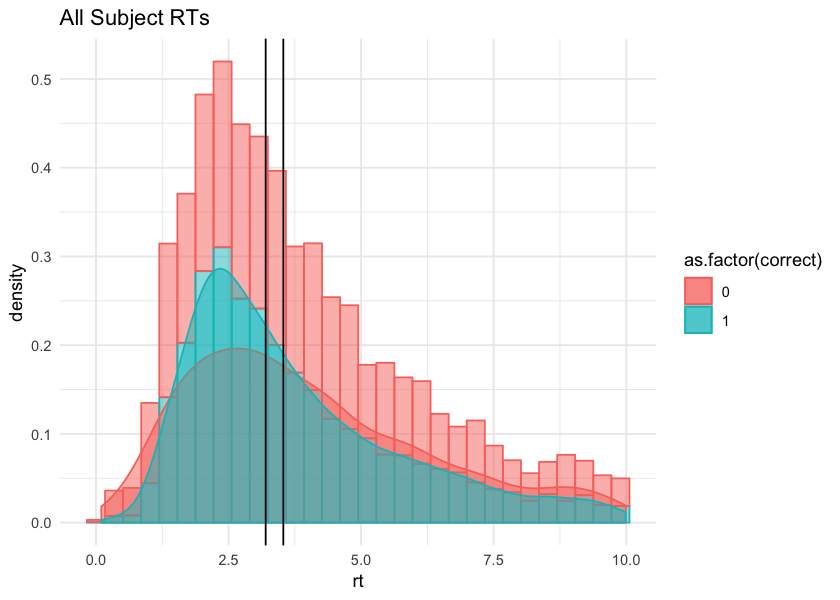

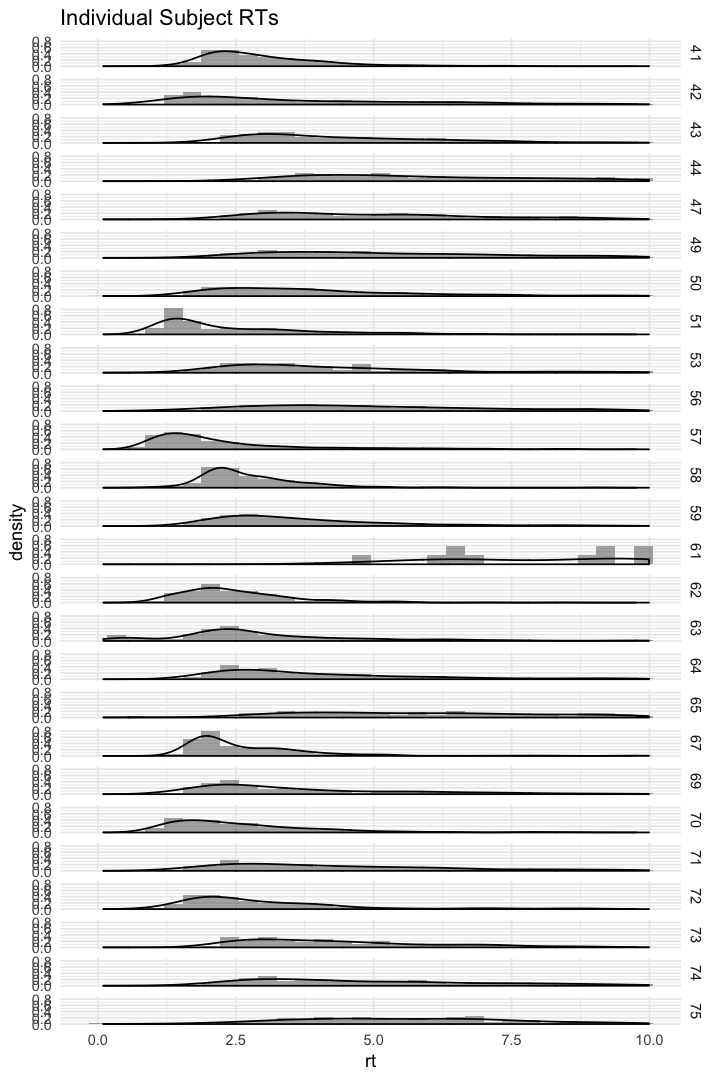

In [250]:
# plot subject rts
x = df %>%
    filter(rt<10) %>% # get rid of super long rts
    group_by(subject, trial) %>%
    summarise(correct = mean(correct),
              rt = mean(rt))

# set size
options(repr.plot.width=7, repr.plot.height=5)
# all subjects
ggplot(x, aes(rt, fill=as.factor(correct), colour=as.factor(correct))) + 
    geom_histogram(aes(y=..density..), alpha=0.5) + 
    geom_density(alpha=0.5) +
    geom_vline(xintercept = median(x$rt[x$correct==0])) +
    geom_vline(xintercept = median(x$rt[x$correct==1])) +
    theme_minimal() +
      ggtitle("All Subject RTs")

# individual
options(repr.plot.width=6, repr.plot.height=9)
p <- ggplot(x, aes(rt)) + geom_histogram(aes(y=..density..), alpha=0.5) + geom_density()
p + facet_grid(rows = vars(subject)) +
    theme_minimal() +
      ggtitle("Individual Subject RTs")

### Plot Accuracy

In [252]:
df_acc = df %>%
    group_by(subject, trial) %>%
    summarise(correct = mean(correct), rt = mean(rt)) %>%
    group_by(subject) %>%
    summarise(rt_sd = sd(rt, na.rm=T),
              min_rt = min(rt),
              max_rt = max(rt),
              accuracy = mean(correct),
              mean_rt=mean(rt))

head(df_acc)

subject,rt_sd,min_rt,max_rt,accuracy,mean_rt
41,1.201811,0.617,9.950,0.8539604,3.042106
42,4.613769,1.133,46.450,0.9158416,4.787309
43,3.670775,0.884,28.799,0.8666667,5.133200
44,6.960738,2.111,56.211,0.8636364,8.737841
47,5.604536,0.332,48.232,0.8905109,6.631639
49,5.630701,1.883,67.449,0.8688119,6.892916


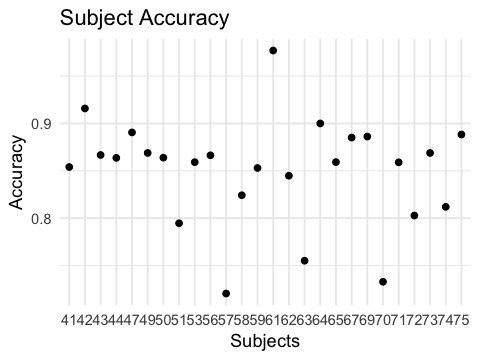

In [253]:
# set plot size
options(repr.plot.width=4, repr.plot.height=3)

# plot subject accuracy
ggplot(data = df_acc,aes(x = as.factor(subject),y = accuracy)) + 
  geom_point() + 
  #geom_line() +
  #geom_errorbar(aes(ymin = rt-rt_se,ymax = rt+rt_se)) + 
  labs(x = "Subjects", y = "Accuracy") +
  theme_minimal() +
  ggtitle("Subject Accuracy")

## Clean

### Identify subjects by Accuracy (low) 

#### pVal of each subject based on accuracy

In [254]:
# get the pValue
df_acc$pVal = pnorm(df_acc$accuracy, mean = mean(df_acc$accuracy), sd = sd(df_acc$accuracy))

# it is cumulative, so for those greater than 0.5, subtract from 1
df_acc[df_acc$pVal>0.5,]$pVal = 1-df_acc[df_acc$pVal>0.5,]$pVal

# add Hause's median outlier detection for comparison
df_acc$outliers = outliersMAD(df_acc$accuracy, MADCutOff = 3, replaceOutliersWith = -999)

# look at the sorted pVals
head(df_acc[order(df_acc$pVal),], 5)

# add to original dataframe (there must be a better way to do this...)
df$outlier_accuracy_pVal = 0
df$outlier_accuracy_MAD = 0

for (sub in unique(df$subject)){
    df[df$subject == sub,]$outlier_accuracy_pVal = df_acc[df_acc$subject == sub,]$pVal
    df[df$subject == sub,]$outlier_accuracy_MAD = df_acc[df_acc$subject == sub,]$outliers
}
tail(df,3)

3 outliers detected.
Outliers replaced with -999


subject,rt_sd,min_rt,max_rt,accuracy,mean_rt,pVal,outliers
57,2.292446,0.683,22.300,0.7202970,2.563577,0.009752489,-999.00
61,20.609968,4.817,118.983,0.9770115,27.373828,0.011536543,-999.00
70,1.516083,0.900,10.150,0.7326733,2.701723,0.017275312,-999.00
63,9.710440,0.250,98.913,0.7549505,5.122329,0.043290477,0.75
42,4.613769,1.133,46.450,0.9158416,4.787309,0.120149832,0.92


date,psychopy_version,exp_version,face_version,house_version,left,subject,block,trial,rt,⋯,accuracy,payout,total_fix_num,total_weights_fix,total_stim_fix,which_fix,fix_stim_val_base,fix_stim_mult,outlier_accuracy_pVal,outlier_accuracy_MAD
2019_Mar_01_1615,3.0.2,3.0.2,0,1,face,75,1,187,6.837,⋯,0.89,14,4,2,2,1,-0.88,0.5,0.2483043,0.89
2019_Mar_01_1615,3.0.2,3.0.2,0,1,face,75,1,187,6.837,⋯,0.89,14,4,2,2,0,0.00,0.0,0.2483043,0.89
2019_Mar_01_1615,3.0.2,3.0.2,0,1,face,75,1,187,6.837,⋯,0.89,14,4,2,2,3,0.24,0.5,0.2483043,0.89


#### Bootstrap confidence interval

In [200]:
nRuns = 1000

bootMeanAccuracy <- function(df) {
  bootSample <- sample_n(df, dim(df)[1], replace = TRUE)
  return(mean(bootSample$accuracy))
}

bootMeans <- replicate(nRuns, bootMeanAccuracy(df_acc))



In [53]:
bootCI <- quantile(bootMeans, c(0.025, 0.975))
sprintf("bootstrap confidence limits:")
bootCI

[1] "bootstrap confidence limits:"

2.5%     97.5% 
0.7668699 0.8653060

In [57]:
boot_df = as.data.frame(bootMeans)

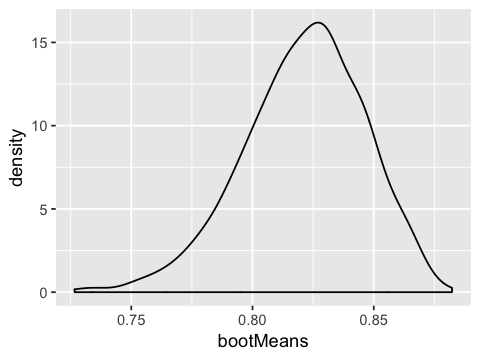

In [59]:
ggplot(data = boot_df, aes(bootMeans)) +
    geom_density()

### Identify trials by RT (slow/fast)

In [255]:
df_rt = df %>%
    group_by(subject) %>%
    select(subject, trial, rt)

In [256]:
# add to original dataframe (there must be a better way to do this...)
df$outlier_rt_pVal = 0
df$outlier_rt_MAD = 0

# Note that the MADCutOff can be tweaked
for (sub in unique(df$subject)){
    df[df$subject == sub,]$outlier_rt_MAD = outliersMAD(df_rt[df_rt$subject == sub,]$rt,
                                                                   MADCutOff = 3,
                                                                   replaceOutliersWith = -999)    
    #df[df$subject == sub,]$outlier_rt_pVal = df_acc[df_acc$subject == sub,]$outliers
}
tail(df,3)

179 outliers detected.
Outliers replaced with -999
153 outliers detected.
Outliers replaced with -999
205 outliers detected.
Outliers replaced with -999
461 outliers detected.
Outliers replaced with -999
58 outliers detected.
Outliers replaced with -999
221 outliers detected.
Outliers replaced with -999
290 outliers detected.
Outliers replaced with -999
457 outliers detected.
Outliers replaced with -999
152 outliers detected.
Outliers replaced with -999
185 outliers detected.
Outliers replaced with -999
58 outliers detected.
Outliers replaced with -999
192 outliers detected.
Outliers replaced with -999
167 outliers detected.
Outliers replaced with -999
190 outliers detected.
Outliers replaced with -999
132 outliers detected.
Outliers replaced with -999
135 outliers detected.
Outliers replaced with -999
49 outliers detected.
Outliers replaced with -999
69 outliers detected.
Outliers replaced with -999
115 outliers detected.
Outliers replaced with -999
41 outliers detected.
Outliers repl

date,psychopy_version,exp_version,face_version,house_version,left,subject,block,trial,rt,⋯,total_fix_num,total_weights_fix,total_stim_fix,which_fix,fix_stim_val_base,fix_stim_mult,outlier_accuracy_pVal,outlier_accuracy_MAD,outlier_rt_pVal,outlier_rt_MAD
2019_Mar_01_1615,3.0.2,3.0.2,0,1,face,75,1,187,6.837,⋯,4,2,2,1,-0.88,0.5,0.2483043,0.89,0,6.84
2019_Mar_01_1615,3.0.2,3.0.2,0,1,face,75,1,187,6.837,⋯,4,2,2,0,0.00,0.0,0.2483043,0.89,0,6.84
2019_Mar_01_1615,3.0.2,3.0.2,0,1,face,75,1,187,6.837,⋯,4,2,2,3,0.24,0.5,0.2483043,0.89,0,6.84


In [257]:
# percent of trials that were removed overall

kept =  (1 - dim(filter(df, outlier_rt_MAD > -900))[1] / (dim(df)[1])) * 100
sprintf("MAD removed %.2f percent of trials", kept)

[1] "MAD removed 7.16 percent of trials"

In [258]:
# percent of trials kept by subject

# Unfiltered DF
x_all = df %>%
    group_by(subject) %>%
    summarise(kept = length(unique(trial)))

# Filtered DF
x = df %>%
    filter(outlier_rt_MAD > -900) %>% # get rid of outlier RTs
    group_by(subject) %>%
    summarise(kept = length(unique(trial)),
              maxRT = max(rt), 
              minRT = min(rt),
              meanRT = mean(rt),
              sdRT = sd(rt))

x$kept = x$kept / x_all$kept
x

subject,kept,maxRT,minRT,meanRT,sdRT
41,0.9678218,5.883,0.617,3.063144,0.9868472
42,0.9678218,14.533,1.133,4.973178,3.1906860
43,0.9416667,9.797,0.884,4.760659,1.8607555
44,0.9545455,21.807,2.111,8.458726,4.2859277
47,0.9598540,15.962,0.332,6.437646,3.2470386
49,0.9579208,15.766,1.883,6.729447,3.3081838
50,0.9331683,11.083,0.100,4.557778,2.1852436
51,0.9900990,6.983,0.900,2.823602,1.5408628
53,0.9863636,11.061,0.374,4.878810,2.2301089
56,0.9381188,15.550,0.667,6.134262,3.3317816


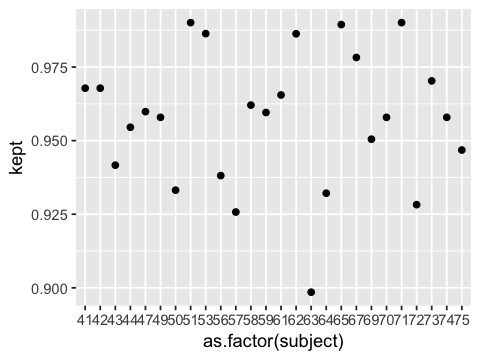

In [259]:
# Plot
ggplot(x, aes(as.factor(subject), kept)) +
    geom_point()

# QUESTION: Remove some subjects if we keep below a certain percentage of trials?

### Remove Outlier subjects and trials

---
* remove low accuracy subjects
* remove outlier RTs
* remove subjects who had less than 50% non-outlier RTs

---

In [208]:
# v3.0.1
v301_clean = df %>%
    filter(outlier_accuracy_MAD > -900) %>% # get rid of outlier accuracy subjects
    filter(outlier_rt_MAD > -900) %>% # get rid of outlier RT trials
    filter(subject != 35) # remove subject with low non outlier RT trials

clean_sub = length(unique(v301_clean$subject))

sprintf("You are keeping %i out of %i total subjects.", clean_sub, length(unique(df_v301$subject)))

[1] "You are keeping 15 out of 17 total subjects."

In [260]:
# v3.0.2
v302_clean = df %>%
    filter(outlier_accuracy_MAD > -900) %>% # get rid of outlier accuracy subjects
    filter(outlier_rt_MAD > -900) # get rid of outlier RT trials

clean_sub = length(unique(v302_clean$subject))

sprintf("You are keeping %i out of %i total subjects.", clean_sub, length(unique(df_v302$subject)))

[1] "You are keeping 23 out of 26 total subjects."

### Export DF

In [209]:
# v3.0.1
saveRDS(v301_clean, "../data/v301_clean.rds")

In [261]:
# v3.0.2
saveRDS(v302_clean, "../data/v302_clean.rds")

# FUNCTIONS 

In [51]:
#' @title Identify outliers using robust median absolute deviation approach
#' @name outliersMAD
#'
#' @description outliersMAD is used to identify outliers in vectors using Leys et al.'s (2003) median absolute deviation approach.
#'
#' @param x a vector of numbers
#' @param MADCutOff value to use as cutoff (Leys e tal. recommend 2.5 or 3.0 as default)
#' @param replaceOutliersWith if value is an outlier, what to replace it with? NA by default
#' @param showMADValues if TRUE, will show deviation score of each value
#' @param outlierIndices return index/position of outlier
#' @param bConstant a constant linked to the assumption of normality of the data, disregarding the abnormality induced by outliers
#' @param digits how many digits/decimals to round output to
#'
#' @return A vector with outliers identified (default converts outliers to NA)
#'
#' @details We can identify and remove outliers in our data by identifying data points that are too extreme—either too many standard deviations (SD) away from the mean or too many median absolute deviations (MAD) away from the median. The SD approach might not be ideal with extreme outliers, whereas the MAD approach is much more robust (for comparison of both approaches, see Leys et al., 2013, Journal of Experimental Social Psychology).
#'
#' @references \itemize{
#' \item Leys, C., Ley, C., Klein, O., Bernard, P., & Licata, L. (2013). Detecting outliers: Do not use standard deviation around the mean, use absolute deviation around the median. Journal of Experimental Social Psychology, 49(4), 764-766. doi:10.1016/j.jesp.2013.03.013 (\url{https://www.sciencedirect.com/science/article/pii/S0022103113000668})}
#' @seealso \code{\link{outliersZ}}
#'
#' @author Hause Lin
#'
#' @export
#'
#' @usage
#' outliersMAD(x, MADCutOff = 2.5, replaceOutliersWith = NA,
#' showMADValues = FALSE, outlierIndices = FALSE, bConstant = 1.4826, digits = 2)
#'
#' @examples
#' example <- c(1, 3, 3, 6, 8, 10, 10, 1000) # 1000 is an outlier
#' outliersMAD(example)
#' outliersMAD(example, MADCutOff = 3.0)
#' outliersMAD(example, MADCutOff = 2.5, replaceOutliersWith = -999)
#' outliersMAD(example, MADCutOff = 1.5, outlierIndices = TRUE)
#' outliersMAD(example, MADCutOff = 1.5, showMADValues = TRUE)
outliersMAD <- function(x, MADCutOff = 2.5, replaceOutliersWith = NA, showMADValues = FALSE, outlierIndices = FALSE, bConstant = 1.4826, digits = 2) {
  # bConstant: usually, b = 1.4826, a constant linked to the assumption of normality of the data, disregarding the abnormality induced by out- liers (Rousseeuw & Croux, 1993).

  # compute number of absolute MADs away for each value: formula: abs( ( x - median(x) ) )/ mad(x)
  absMADAway <- abs((x - stats::median(x, na.rm = T))/stats::mad(x, constant = bConstant, na.rm = T))
  # subset data that has absMADAway greater than the MADCutOff and replace them with replace
  x[absMADAway > MADCutOff] <- replaceOutliersWith
  outliers <- length(x[absMADAway > MADCutOff])
  if (showMADValues) { # if values == TRUE, return number of mads for each value
    message("Showing absolute MAD from median for each value.")
    message(paste0(outliers, " outliers detected."))
    return(round(absMADAway, digits))
  } else if (outlierIndices) {
    message("Showing indices of outliers.")
    return(which(is.na(x)))
  } else {
    message(paste0(outliers, " outliers detected."))
    message(paste0("Outliers replaced with ", replaceOutliersWith))
    return(round(x, digits)) # otherwise, return original with outliers replaced
  }
}